<h1> ~Neural Collaborative Filtering -  Implementation with Keras </h>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

**Define dataset folder and files**

In [2]:
RATING_DATA_FILE_TRAIN = 'u1.base'
RATING_DATA_FILE_TEST = 'u1.test'
MOVIES_DATA_FILE_PATH = 'u.item'
USERS_DATA_FILE_PATH = 'u.user'

In [3]:
# lets explore movies.csv
m_cols = ['movie_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
data= pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u.item',delimiter='|',names=m_cols,encoding='latin-1')
data.shape

(1682, 24)

In [4]:
#explore users
u_cols = ['user_id','age','gender','occupation','zip_code']
data_u = pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u.user',delimiter='|',names=u_cols,encoding='latin-1')
data_u.shape

(943, 5)

In [5]:
r_cols = ['user_id','movie_id','rating','timestamp']
data_r = pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u1.base',delimiter='\t',names=r_cols,encoding='latin-1')
data_r.shape

(80000, 4)

Histogram


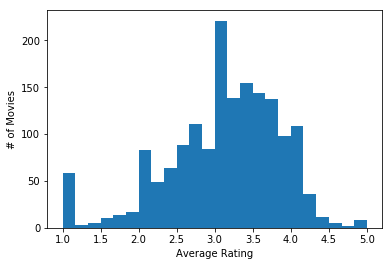

   movie_id                                 movie title  rating
0      1500                   Santa with Muscles (1996)     5.0
1      1201  Marlene Dietrich: Shadow and Light (1996)      5.0
2      1293                             Star Kid (1997)     5.0


In [6]:
# 1.1
dataRating=data.merge(data_r,on = 'movie_id',how = 'inner')
averageMovieRating = dataRating.groupby(['movie_id', 'movie title'])['rating'].mean().sort_values(ascending=False).reset_index()

print('Histogram')
plt.hist(averageMovieRating['rating'],bins='auto')
plt.xlabel('Average Rating')
plt.ylabel('# of Movies')


plt.show()

bestRating = averageMovieRating.head(3)
print(bestRating)

In [7]:
#1.2

merged_data=dataRating.merge(data_u,on = 'user_id', how='inner')

femaleData = merged_data.loc[merged_data['gender'] == 'F']
maleData = merged_data.loc[merged_data['gender'] == 'M']


Histogram


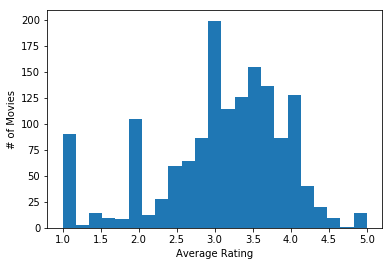

   movie_id                            movie title gender  ratingFemale
0      1472  Visitors, The (Visiteurs, Les) (1993)      F           5.0
1      1594                         Everest (1998)      F           5.0
2      1599          Someone Else's America (1995)      F           5.0


In [8]:
#female
averageMovieRatingFemale = femaleData.groupby(['movie_id','movie title','gender'])['rating'].mean().sort_values(ascending=False).reset_index()

averageMovieRatingFemale.columns = ['movie_id','movie title','gender', 'ratingFemale']
print('Histogram')
plt.hist(averageMovieRatingFemale['ratingFemale'],bins='auto')
plt.xlabel('Average Rating')
plt.ylabel('# of Movies')
plt.show()
bestRating = averageMovieRatingFemale.head(3)
print(bestRating)

Histogram


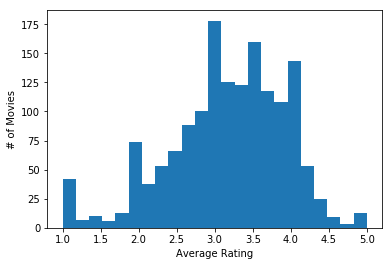

   movie_id                     movie title gender  ratingMale
0      1293                 Star Kid (1997)      M         5.0
1      1656              Little City (1998)      M         5.0
2      1122  They Made Me a Criminal (1939)      M         5.0


In [9]:
#male

averageMovieRatingMale = maleData.groupby(['movie_id','movie title','gender'])['rating'].mean().sort_values(ascending=False).reset_index()
averageMovieRatingMale.columns = ['movie_id','movie title','gender', 'ratingMale']
print('Histogram')
plt.hist(averageMovieRatingMale['ratingMale'],bins='auto')
plt.xlabel('Average Rating')
plt.ylabel('# of Movies')
plt.show()
bestRating = averageMovieRatingMale.head(3)
print(bestRating)

#1.2 לענות על הסיף בהתאם לתוצאות שיצאו לנו

## 1.2 


In [13]:
males_and_females_ratings = averageMovieRatingMale.merge(averageMovieRatingFemale,on="movie_id")
#print(males_and_females_ratings)
#print(males_and_females_ratings[['movie title_x','ratingMale','ratingFemale']])

difference_between_genders=males_and_females_ratings.apply(lambda row: (abs(row['ratingMale']-row['ratingFemale'])), axis=1)
difference_between_genders_df = pd.DataFrame({'movieid':difference_between_genders.index, 'difference':difference_between_genders.values})
#difference_between_genders["movieID"] = males_and_females_ratings["movie_id"].values
x = np.array(males_and_females_ratings["movie_id"].values)
y = np.array(difference_between_genders)
z = np.array(males_and_females_ratings["movie title_x"].values)
df = pd.DataFrame({'movieID':x,'movieTitle':z, 'res':y})
df.sort_values('res', inplace=True, ascending=False)
print('head')
print(df.head(5))

print(' tail')
print(df.tail(5))

print(' mean')
print(df['res'].mean())

head
    movieID                                   movieTitle       res
1      1175                             Hugo Pool (1997)  4.000000
7       851  Two or Three Things I Know About Her (1966)  3.666667
15     1429                         Sliding Doors (1998)  3.500000
16      641                        Paths of Glory (1957)  3.461538
50     1592                       Magic Hour, The (1998)  3.250000
 tail
      movieID                   movieTitle  res
164      1194    Once Were Warriors (1994)  0.0
1324     1289        Jack and Sarah (1995)  0.0
939       914           Wild Things (1998)  0.0
909        34  Doom Generation, The (1995)  0.0
945      1454  Angel and the Badman (1947)  0.0
 mean
0.5309060513841749


#1.3

In [72]:
m_cols = ['unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
def showPraph(m_cols,high_rated,title):
    
    genres_count = {}
    for g in m_cols:
        count = 0
        genre_movies = high_rated[g] == 1
        genres_count[g] = high_rated[genre_movies].shape[0]
    genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
    #print(genres_count_list)
    # lets display the same result in the histogram
    fig = plt.figure(1, figsize=(18,13))
    ax2 = fig.add_subplot(2,1,2)
    y_axis = [genres_count[i] for i in genres_count]
    x_axis = [i for i in range(len(genres_count))]
    x_label = [i for i in genres_count]
    plt.xticks(rotation=85, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(x_axis, x_label)
    plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
    ax2.bar(x_axis, y_axis, align = 'center', color='r')
    plt.title(title,bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
    plt.show()

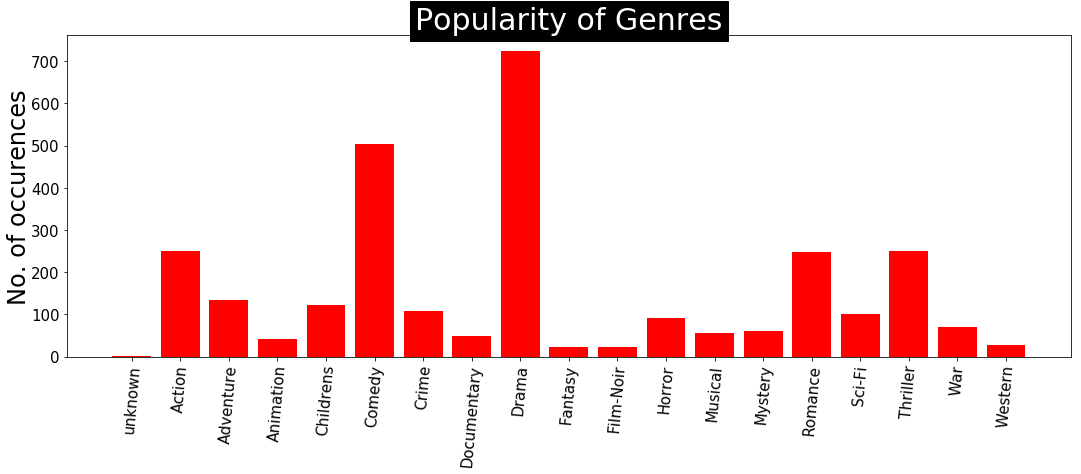

In [73]:
import operator
showPraph(m_cols,data,"Popularity of Genres")

**high rating > 4 male and female **

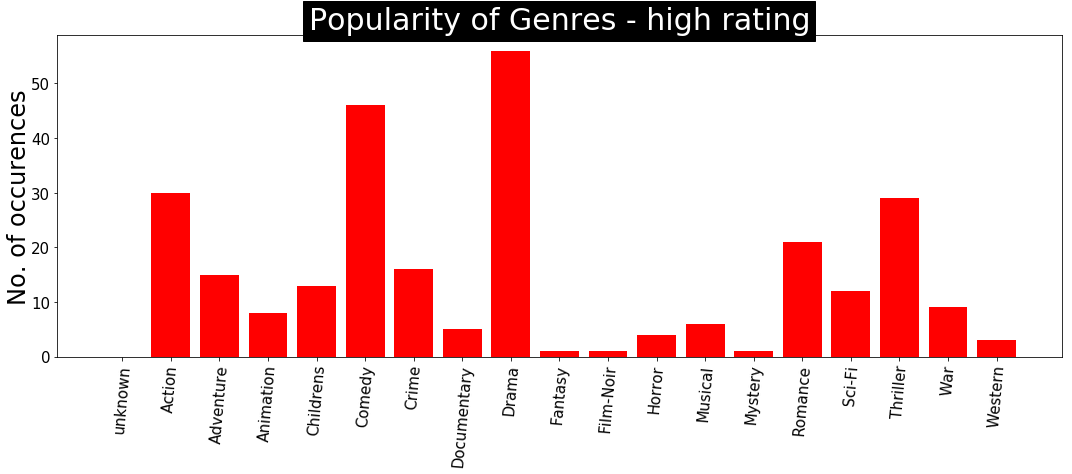

In [74]:
amit = pd.merge(averageMovieRating,data, left_index=True,right_on='movie_id', how='outer')
high_rated_indexes = amit['rating']>4.0
high_rated = amit[high_rated_indexes]
showPraph(m_cols,high_rated,"Popularity of Genres - high rating")

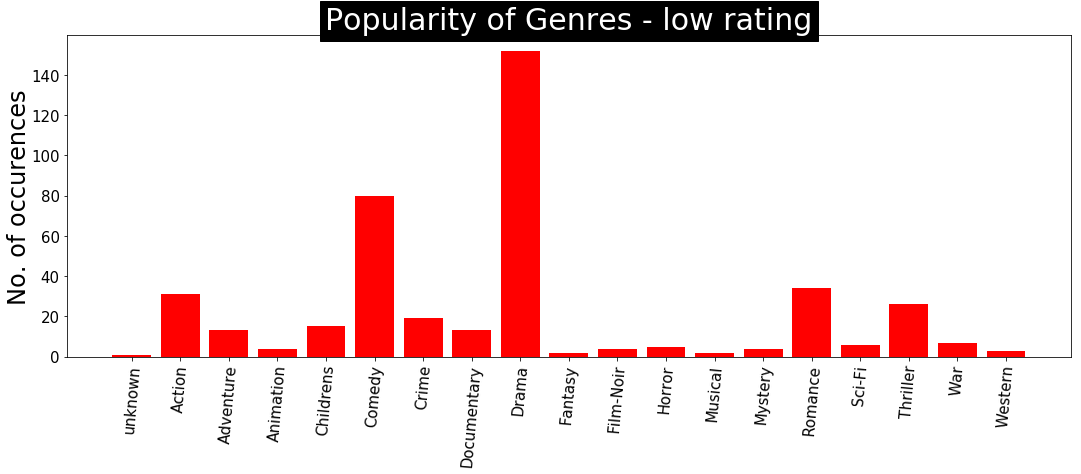

In [75]:
amit = pd.merge(averageMovieRating,data, left_index=True,right_on='movie_id', how='outer')
low_rated_indexes = amit['rating']<2.5
low_rated = amit[low_rated_indexes]
showPraph(m_cols,low_rated,"Popularity of Genres - low rating")

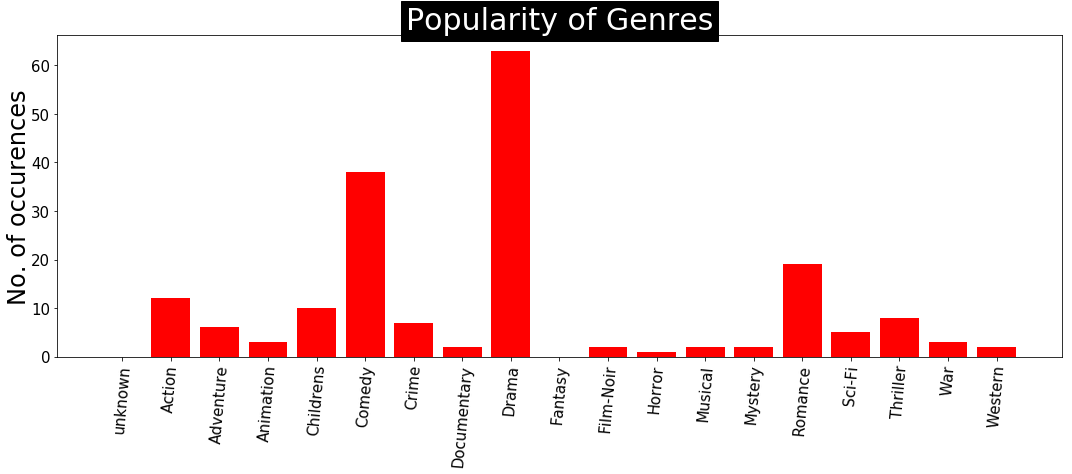

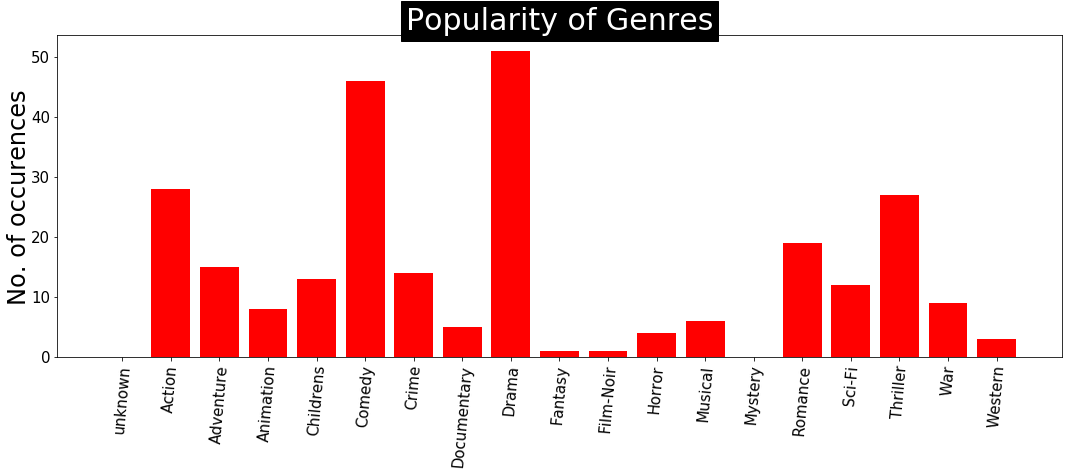

In [69]:

female_average_rating_genre=pd.merge(averageMovieRatingFemale,data, left_index=True,right_on='movie_id', how='inner')
#print(female_average_rating_genre)
low_rated_female_indexes1 = female_average_rating_genre['ratingFemale']<2.0
low_rated_female = female_average_rating_genre[low_rated_female_indexes1]
#print(low_rated_indexes1)
showPraph(m_cols,low_rated_female,"female - low rating")

high_rated_indexes1 = female_average_rating_genre['ratingFemale']>4.0
high_rated_female = female_average_rating_genre[high_rated_indexes1]
showPraph(m_cols,high_rated_female,"female - high rating")

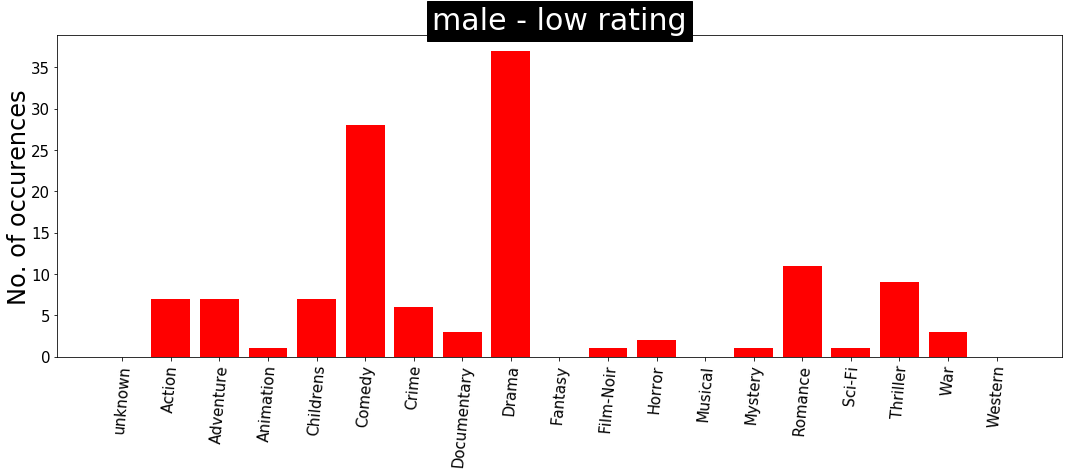

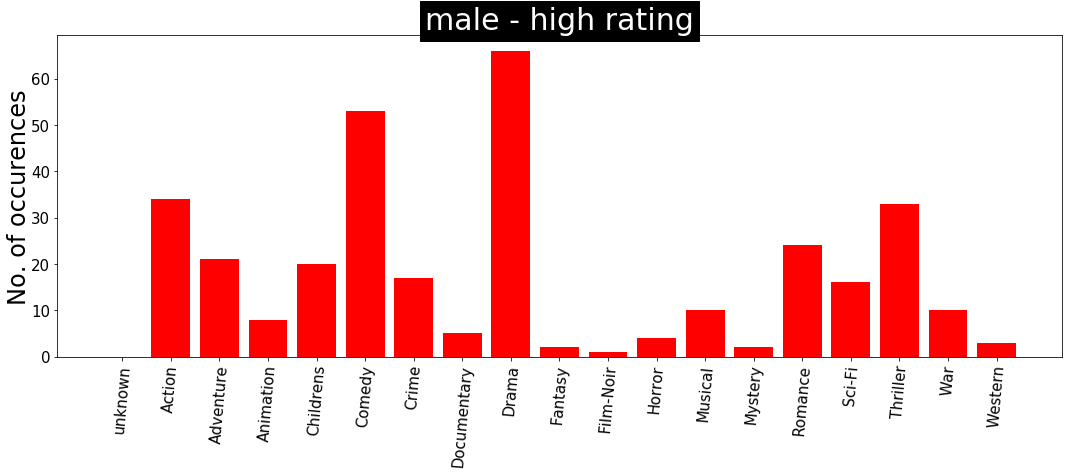

In [76]:
male_average_rating_genre=pd.merge(averageMovieRatingMale,data, left_index=True,right_on='movie_id', how='inner')
#print(female_average_rating_genre)
low_rated_male_indexes1 = male_average_rating_genre['ratingMale']<2.0
low_rated_male = male_average_rating_genre[low_rated_male_indexes1]
#print(low_rated_indexes1)
showPraph(m_cols,low_rated_male,"male - low rating")

high_rated_indexes1 = male_average_rating_genre['ratingMale']>4.0
high_rated_male = male_average_rating_genre[high_rated_indexes1]
showPraph(m_cols,high_rated_male,"male - high rating")

In [ ]:
# check frequency and multipply mean movie rating
count_rating_per_movie = data_r['movie_id'].value_counts()
ddd=dataRating.groupby(['movie_id', 'movie title'])['rating'].mean().sort_values(ascending=False)

count_rating_per_movie_df = pd.DataFrame({'movie_id':count_rating_per_movie.index, 'frequency':count_rating_per_movie.values})

count_with_rating = pd.merge(averageMovieRating, count_rating_per_movie_df, left_index=True, right_on='movie_id', how='inner')

x = np.array(count_with_rating["rating"].values*count_with_rating["frequency"].values)
#print(count_rating_per_movie_df['movie_id'])
#print(count_rating_per_movie_df)


q2.1

In [145]:
import numpy
def Prediction_by_total_avg(movie_id):
    all_rating = averageMovieRating['rating']
    return(numpy.mean(all_rating))

In [146]:
def Prediction_by_movie_avg(movie_id):
    row = averageMovieRating[averageMovieRating['movie_id']==movie_id]
    if row.empty:
        return Prediction_by_total_avg(movie_id)
    else:
        return row.iloc[0]['rating']

In [147]:
test_cols = ['user_id','movie_id','rating','timestamp']
data_test = pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u1.test',delimiter='\t',names=test_cols,encoding='latin-1')
data_test.shape
#merging two dataframes movies and ratings
test_set=data.merge(data_test,on = 'movie_id',how = 'inner')
for index, row in test_set.iterrows():  
    test_set.set_value(index,'pridected_rating_by_movie_avg',Prediction_by_movie_avg(row['movie_id']))
    test_set.set_value(index,'pridected_rating_by_total_avg',Prediction_by_total_avg(row['movie_id']))

In [148]:
test_set['dif_movie_avg_pridct_with_actual']=(test_set['rating']-test_set['pridected_rating_by_movie_avg']).abs()
mae_pridct_by_movie_avg=numpy.mean(test_set['dif_movie_avg_pridct_with_actual'])
print("MAE mthod 1: predicted by movie averge:",mae_pridct_by_movie_avg)


MAE mthod 1: predicted by movie averge: 0.8272262612291202


In [149]:
test_set['dif_total_avg_pridct_with_actual']=(test_set['rating']-test_set['pridected_rating_by_total_avg']).abs()
mae_pridct_by_total_avg=numpy.mean(test_set['dif_total_avg_pridct_with_actual'])
print("MAE mthod 1: predicted by all movies averge:",mae_pridct_by_total_avg)

MAE mthod 1: predicted by all movies averge: 1.0208669554938976


q2.2

In [170]:
from IPython.display import display
data_columns = ['user_id','item_id','rating','timestamp']
base = pd.read_csv('d:/documents/users/ravedan/Downloads/ml-100k/u1.base',delimiter='\t',names=data_columns)
data = base.drop(['user_id', 'timestamp'], axis = 1)

#print(data)
data_by_item_id = data.groupby(['item_id'])
#print(data_by_item_id.mean())

mean_rating_per_item_id = data_by_item_id.mean().reset_index('item_id').sort_values('rating', ascending=False)

#print(mean_rating_per_item_id)
columns_movies_recommandation = ['user_id','item_id']
movies_to_recommand_average = pd.DataFrame(columns = columns_movies_recommandation)
#print(movies_to_recommand_average)
train_user_id_movie_id = base.drop(['rating', 'timestamp'], axis = 1)
test_unique_users = (data_test['user_id']).unique()
#print(test_unique_users)
for user_id in test_unique_users:
    rows_with_user_id = train_user_id_movie_id[train_user_id_movie_id['user_id'] == user_id]
    movies_wasnt_watched = mean_rating_per_item_id[~mean_rating_per_item_id.item_id.isin(rows_with_user_id.item_id)]
    top_20_movies_wasnt_watched = movies_wasnt_watched.head(20).drop(['rating'],axis=1)
    movies_to_recommand_average = movies_to_recommand_average.append(top_20_movies_wasnt_watched.assign(user_id = user_id))
print('top 20 movies with the best average rating for each user that this user havent seen already')
display(movies_to_recommand_average)

top 20 movies with the best average rating for each user that this user havent seen already


,item_id,user_id
1181,1189.0,1.0
1620,1653.0,1.0
1566,1599.0,1.0
1479,1500.0,1.0
1449,1467.0,1.0
1193,1201.0,1.0
1115,1122.0,1.0
1284,1293.0,1.0
1433,1449.0,1.0
1352,1367.0,1.0


In [171]:
movies_to_recommand_random = pd.DataFrame(columns = columns_movies_recommandation)
for user_id in test_unique_users:
    rows_with_user_id = train_user_id_movie_id[train_user_id_movie_id['user_id'] == user_id]
    movies_wasnt_watched = mean_rating_per_item_id[~mean_rating_per_item_id.item_id.isin(rows_with_user_id.item_id)]
    top_20_movies_wasnt_watched = movies_wasnt_watched.sample(20).drop(['rating'],axis=1)
    movies_to_recommand_random = movies_to_recommand_random.append(top_20_movies_wasnt_watched.assign(user_id = user_id))
print('random 20 movies to recommand for each user which the user havent seen already:')
display(movies_to_recommand_random)

random 20 movies to recommand for each user which the user havent seen already:


,item_id,user_id
1465,1483.0,1.0
1552,1584.0,1.0
1025,1032.0,1.0
421,422.0,1.0
263,264.0,1.0
1436,1452.0,1.0
1226,1234.0,1.0
1058,1065.0,1.0
695,697.0,1.0
311,312.0,1.0


In [174]:
def user_rated_movie(user_id,movie_id):
    rows=data_r[data_r['movie_id']==movie_id]
    row=rows[rows['user_id']==user_id]
    return not row.empty

In [175]:
def get_movies_user_saw(user_id):
    return data_test[data_test["user_id"]==user_id]

In [176]:
def get_top_20_movies_metric_1(user_id,df):
    results=pd.DataFrame(columns=['movie_id','movie title'])
    i=0
    for index, row in df.iterrows():  
        if not user_rated_movie(user_id,row['movie_id']):
            results.set_value(i,'movie_id',row['movie_id'])
            results.set_value(i,'movie title',row['movie title'])
            if (i==19):
                    return results
            i=i+1

    return results.head(20)

In [177]:
def calc_recall_and_precision(df):
    users_from_test_set=data_test.user_id.unique()
    results=pd.DataFrame(users_from_test_set,columns=['user_id'])
    for index, row in results.iterrows():  
        top20_for_user= get_top_20_movies_metric_1(row['user_id'],df)
        movies_user_actual_saw=get_movies_user_saw(row['user_id'])
        intersection = pd.merge(top20_for_user, movies_user_actual_saw, how='inner', on=['movie_id'])
        recall=len(intersection.index)/len(movies_user_actual_saw.index)
        results.set_value(index,'recall',recall)
        precision=len(intersection.index)/20;
        results.set_value(index,'precision',precision)
    return results

In [179]:
res_a = calc_recall_and_precision(averageMovieRating)
mean_recall=numpy.mean(res_a['recall'])
print("The mean recall of the first metric is:", mean_recall)
mean_precision=numpy.mean(res_a['precision'])
print("The mean precision of the first metric is:", mean_precision)

The mean recall of the first metric is: 0.022308444169231088
The mean precision of the first metric is: 0.04575163398692821
